In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from matplotlib import rcParams


In [2]:
df =pd.read_csv('creditcard.csv/creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### EXPLORATORY ANALYSIS

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isnull().values.any()

np.False_

In [7]:
count_class = df.groupby('Class').size().sort_values(ascending=False).reset_index(name='count')
count_class

,Class,count
0,0,284315
1,1,492


In [8]:
count_class['Class']= dict({ 0: 'Normal',
                   1: 'Fraud'})
count_class

,Class,count
0,Normal,284315
1,Fraud,492


Text(0.5, 1.0, 'Class distribution')

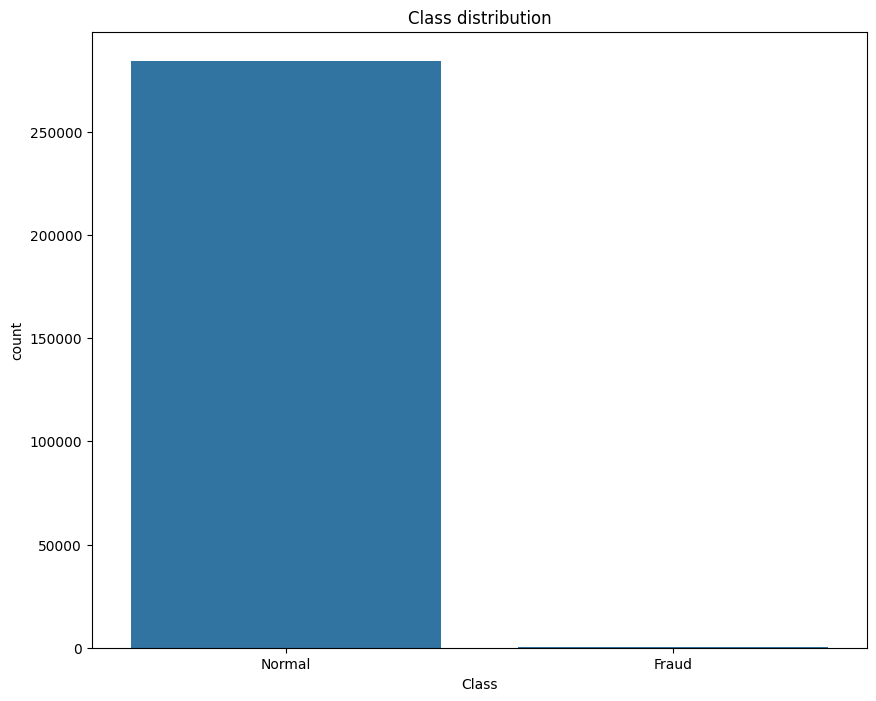

In [9]:
plt.figure(figsize=(10, 8))
sns.barplot(data=count_class,  x='Class', y='count')
plt.title('Class distribution')


## Separating the Normal and the fraud

In [10]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f'Fraud shape:{fraud.shape}, Normal:{normal.shape}')

Fraud shape:(492, 31), Normal:(284315, 31)


In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

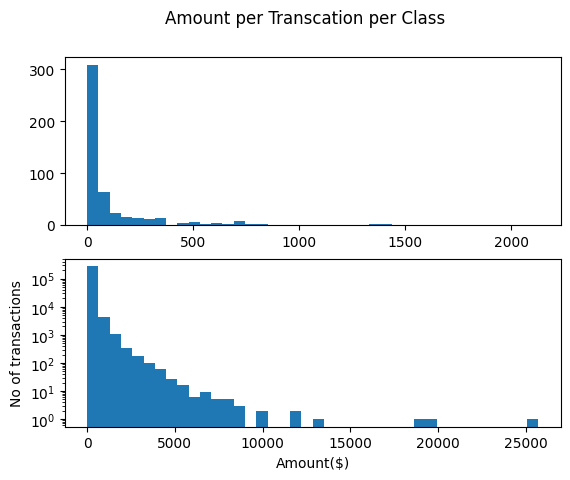

In [13]:
fig, (ax1, ax2) =plt.subplots(2, 1)
fig.suptitle('Amount per Transcation per Class')
bins =40
ax1.hist(fraud.Amount, bins=bins)
ax2.hist(normal.Amount, bins=bins)
plt.xlabel('Amount($)')
plt.ylabel('No of transactions')
plt.yscale('log')
plt.show()

### Checking fradulent transactions by time frame

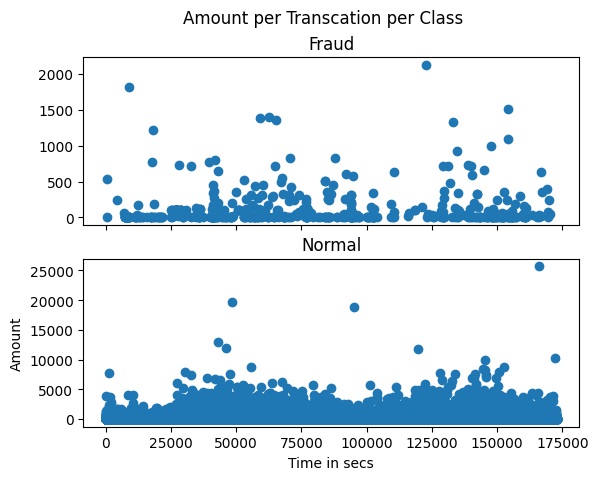

In [14]:
fig, (ax1, ax2) =plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per Transcation per Class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time in secs')
plt.ylabel('Amount')
plt.show()

Taking sample of the dataset

In [15]:
data = df.sample(frac=0.1, random_state=1)
data.shape

(28481, 31)

In [16]:
Fraud = data[data['Class']== 1]
Normal =data[data['Class']== 0]
fract =len(Fraud)/float(len(Normal))



In [17]:
print(fract)
print(f' Fraud Transactions: {len(Fraud)}')
print(f' Normal Transactions: {len(Normal)}')

0.0017234102419808666
 Fraud Transactions: 49
 Normal Transactions: 28432


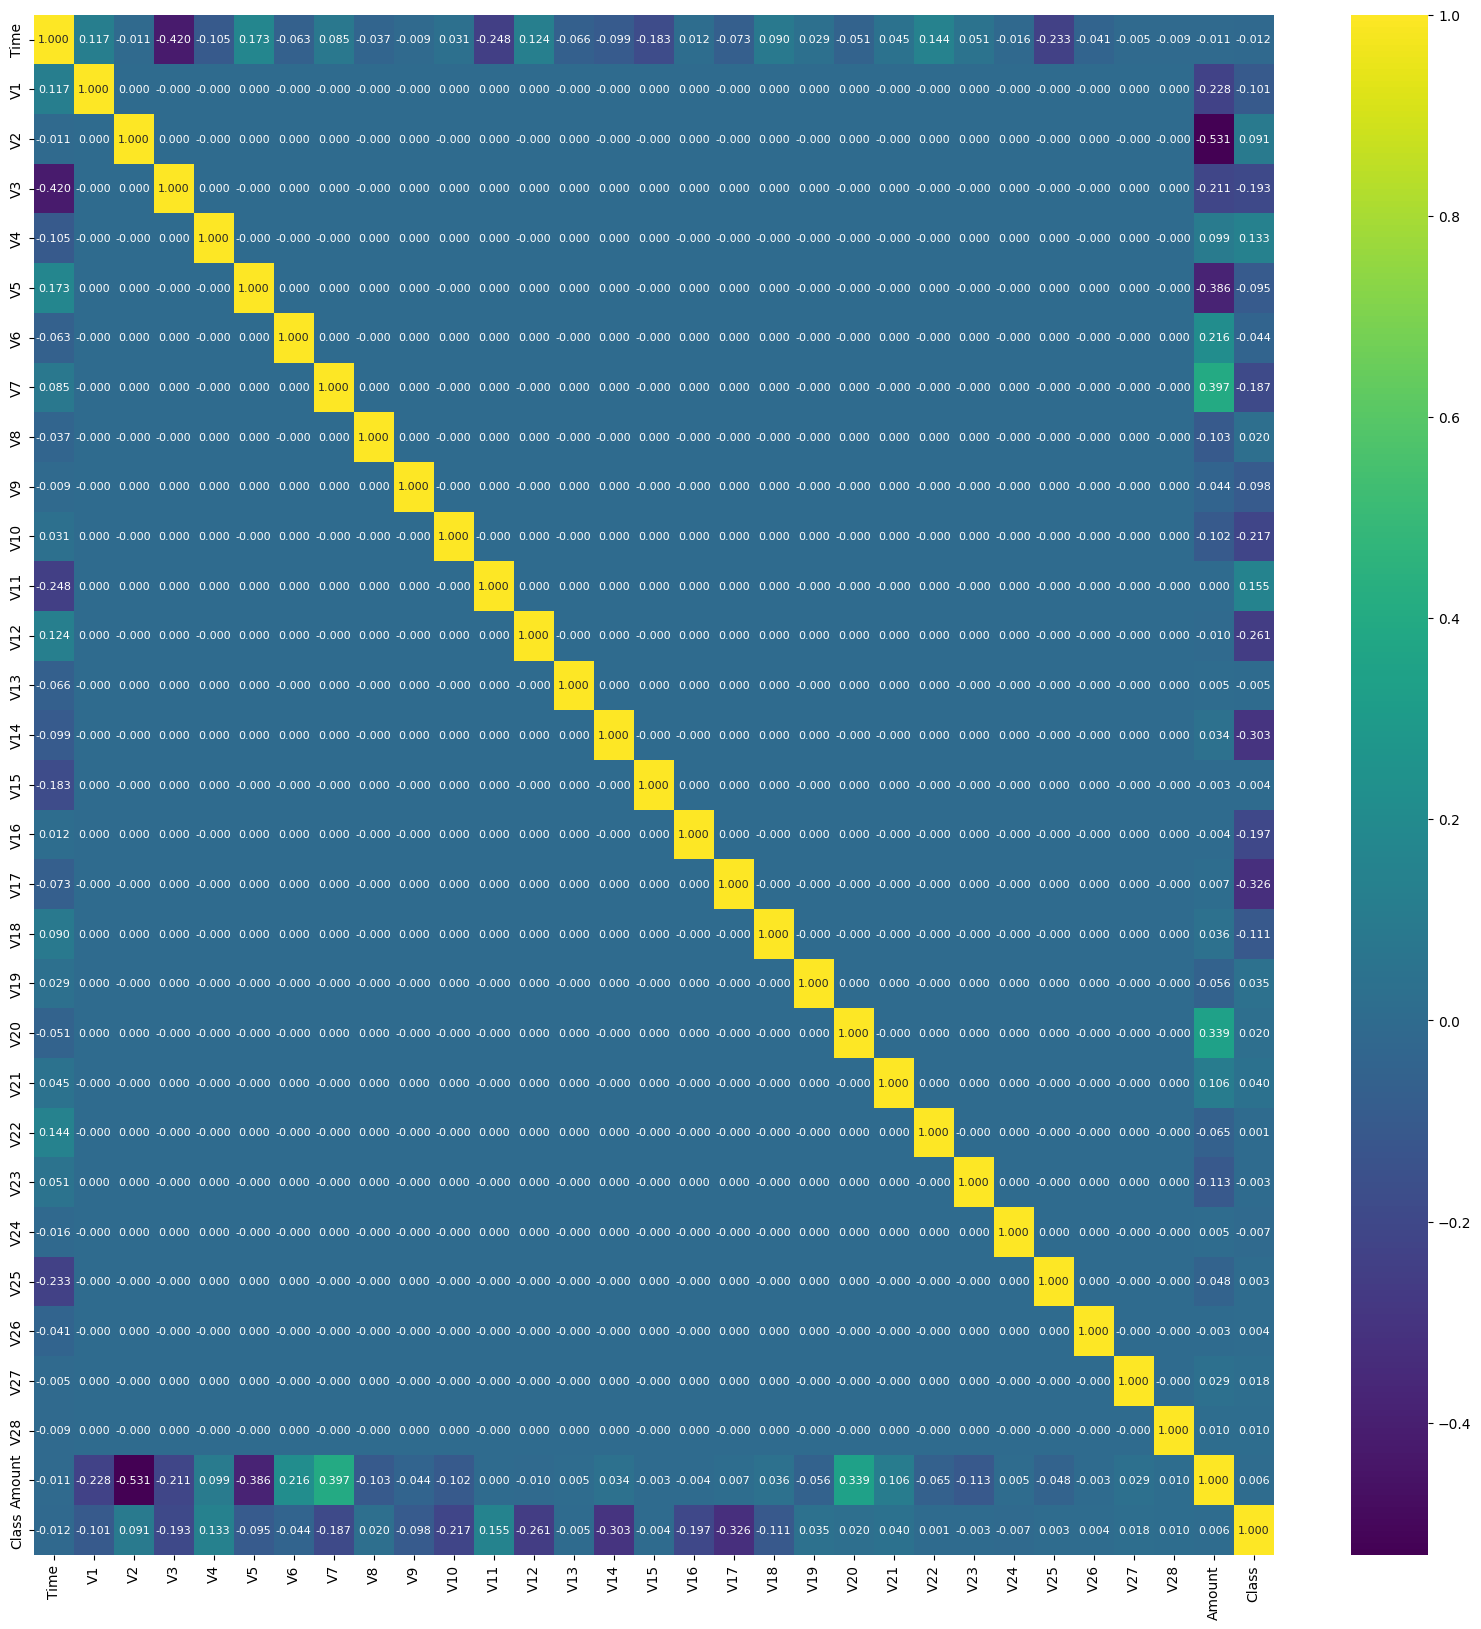

In [18]:
corr_data= data.corr()
top_corr_feat = corr_data.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df[top_corr_feat].corr(), annot=True, cmap='viridis', fmt='.3f', annot_kws={'size':8})


In [19]:
#Creating Independent and dependent features
col = data.columns.tolist()
col
X= data.drop(columns='Class')
X.head()
y= data['Class']
y


169876    0
127467    0
137900    0
21513     0
134700    0
         ..
2032      0
240932    0
3701      0
153365    0
97365     0
Name: Class, Length: 28481, dtype: int64

In [20]:
print(f' X shape: {X.shape}, y shape: {y.shape}')

 X shape: (28481, 30), y shape: (28481,)


In [21]:
#Creating noise
state=np.random.RandomState(42)
X_noise = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
X_noise[20]

array([0.16893506, 0.27859034, 0.17701048, 0.08870253, 0.12063587,
       0.46077877, 0.20633372, 0.36426986, 0.50341727, 0.69039483,
       0.03931214, 0.7994104 , 0.62790039, 0.08175903, 0.87357862,
       0.9208724 , 0.06107796, 0.27687765, 0.80620128, 0.74825969,
       0.18452102, 0.20934932, 0.3704721 , 0.48452299, 0.61825477,
       0.36891364, 0.46253472, 0.74747094, 0.0366832 , 0.25243694])

#### Isolation Forest Algorithm Model

In [22]:
#Isolation Forest
isoforest = IsolationForest(n_estimators=100, max_features=len(X.columns), contamination=fract, random_state=state)
isoforest.fit(X)
iso_pred =isoforest.predict(X)
anomaly_score = isoforest.decision_function(X)
print("Anomaly_score:", max(anomaly_score))



Anomaly_score: 0.3176009794950106


In [23]:
def predict_score (y_pred):
    y_test = y
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors =(y_pred != y_test).sum()
    print(n_errors)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Classification report: ')
    print(classification_report(y_test, y_pred, zero_division=1))

In [24]:
predict_score(iso_pred)

83
Accuracy Score:  0.9970857764825674
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.16      0.16      0.16        49

    accuracy                           1.00     28481
   macro avg       0.58      0.58      0.58     28481
weighted avg       1.00      1.00      1.00     28481



#### Local Outlier Factor Algorithm

In [25]:
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30, metric="minkowski", p=2, metric_params=None, contamination=fract)
lof_pred = lof.fit_predict(X)
lof_score =lof.negative_outlier_factor_
print('Anomaly Score', lof_score)

Anomaly Score [-1.04009684 -1.01681044 -1.02971646 ... -0.9980937  -1.05205114
 -0.99057752]


In [26]:
print('Anomaly Score', max(lof_score))

Anomaly Score -0.9334634739075776


In [27]:
predict_score(lof_pred)

97
Accuracy Score:  0.9965942207085425
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



#### Support Vector Machine

In [28]:
svm = OneClassSVM(kernel='rbf', degree=3,gamma=0.1,nu=0.05, max_iter=-1)
svm.fit(X)
svm_pred=svm.predict(X)

In [29]:
predict_score(svm_pred)

8516
Accuracy Score:  0.7009936448860644
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     28432
           1       0.00      0.37      0.00        49

    accuracy                           0.70     28481
   macro avg       0.50      0.53      0.41     28481
weighted avg       1.00      0.70      0.82     28481

